In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.models import Sequential, load_model
from keras.optimizers import SGD
from keras.utils import np_utils
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [25]:
# Image parameters
width = 150
height = 150

get_binarized_data = False

# Training parameters
epochs = 24
batch_size = 5
neurons = 250

In [26]:
dataset = {'data': [], 'labels': []}

if get_binarized_data:
    list_types = ['benigno', 'maligno']
else:
    list_types = ['original_data/benigno', 'original_data/maligno']
# Benigno will be 0, and Maligno will be 1
for num_tipo, nome_tipo in enumerate(list_types):
    for i,file_name in enumerate(os.listdir(nome_tipo)):
        if i == 99:
            break
        img = cv2.imread(nome_tipo + '/' + file_name, 0)
        # reshape the image
        resized_image = cv2.resize(img, (width, height)) 
        # flatten the image
        resized_image = resized_image.reshape(-1)
        # append each image to the dataset
        dataset['data'].append(resized_image)
        # with respective label
        dataset['labels'].append(num_tipo)

In [27]:
# Converte array para nparray
dataset['data'] = np.array(dataset['data'])
dataset['labels'] = np.array(dataset['labels'])

In [28]:
# Reshape the data to a (70000, 28, 28) tensor
data = dataset['data'].reshape((dataset['data'].shape[0], width, height))

# Reshape the data to a (70000, 28, 28, 1) tensord
data = data[:, :, :, np.newaxis]

# Scale values from range of [0-255] to [0-1]
scaled_data = data / 255.0

In [29]:
# Split the dataset into training and test sets
(train_data, test_data, train_labels, test_labels) = train_test_split(
        scaled_data,
        dataset['labels'].astype("int"), 
        test_size = 0.20)

# Tranform training labels to one-hot encoding
train_labels = np_utils.to_categorical(train_labels, 2)

# Tranform test labels to one-hot encoding
test_labels = np_utils.to_categorical(test_labels, 2)

In [30]:
# Create a sequential model
model = Sequential()

# Add the first convolution layer
model.add(Convolution2D(
    filters = 50,
    kernel_size = (5, 5),
    padding = "same",
    input_shape = (width, height, 1)))

# Add a ReLU activation function
model.add(Activation(
    activation = "relu"))

# Add a pooling layer
model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides =  (2, 2)))

# Add the second convolution layer
model.add(Convolution2D(
    filters = 20,
    kernel_size = (5, 5),
    padding = "same"))

# Add a ReLU activation function
model.add(Activation(
    activation = "relu"))

# Add a second pooling layer
model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2)))

# Flatten the network
model.add(Flatten())

# Add a fully-connected hidden layer
model.add(Dense(neurons))

# Add a ReLU activation function
model.add(Activation(
    activation = "relu"))

# Add a fully-connected output layer
model.add(Dense(2))

# Add a softmax activation function
model.add(Activation("softmax"))

# Compile the network
model.compile(
    loss = "categorical_crossentropy", 
    optimizer = SGD(lr = 0.01),
    metrics = ["accuracy"])

# Train the model 
history = model.fit(
    train_data, 
    train_labels, 
    batch_size = batch_size, 
    epochs = epochs,
    verbose = 1,
    validation_data=(test_data, test_labels))

# Evaluate the model
(loss, accuracy) = model.evaluate(
    test_data, 
    test_labels,
    batch_size = batch_size, 
    verbose = 1)

Train on 158 samples, validate on 40 samples
Epoch 1/24
158/158 [==============================] - 8s 51ms/step - loss: 0.7110 - acc: 0.4747 - val_loss: 0.6983 - val_acc: 0.3500
Epoch 2/24
158/158 [==============================] - 8s 49ms/step - loss: 0.6951 - acc: 0.5190 - val_loss: 0.7014 - val_acc: 0.3500
Epoch 3/24
158/158 [==============================] - 8s 52ms/step - loss: 0.6930 - acc: 0.5380 - val_loss: 0.7072 - val_acc: 0.3500
Epoch 4/24
158/158 [==============================] - 8s 53ms/step - loss: 0.6908 - acc: 0.5316 - val_loss: 0.7212 - val_acc: 0.3500
Epoch 5/24
158/158 [==============================] - 8s 52ms/step - loss: 0.6906 - acc: 0.5380 - val_loss: 0.7351 - val_acc: 0.3500
Epoch 6/24
158/158 [==============================] - 9s 57ms/step - loss: 0.6930 - acc: 0.5380 - val_loss: 0.7120 - val_acc: 0.3500
Epoch 7/24
158/158 [==============================] - 8s 52ms/step - loss: 0.6907 - acc: 0.5380 - val_loss: 0.7094 - val_acc: 0.3500
Epoch 8/24
158/158 [====

KeyboardInterrupt: 

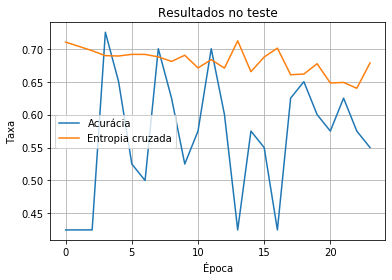

In [24]:
print_test_results(history)

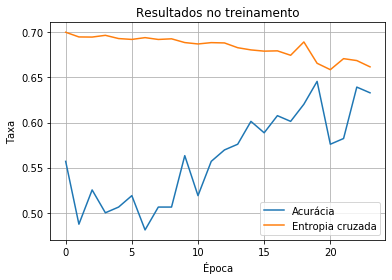

In [17]:
print_train_results(history)

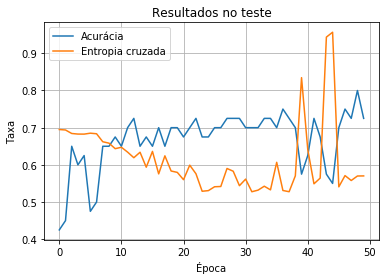

In [152]:
print_test_results(history)

In [15]:
def print_test_results(history):
    plt.plot(history.history['val_acc'])
    plt.plot(history.history['val_loss'])
    plt.title('Resultados no teste')
    plt.ylabel('Taxa')
    plt.xlabel('Época')
    plt.legend(['Acurácia', 'Entropia cruzada'], loc='best')
    plt.grid()
    plt.show()


def print_train_results(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['loss'])
    plt.title('Resultados no treinamento')
    plt.ylabel('Taxa')
    plt.xlabel('Época')
    plt.legend(['Acurácia', 'Entropia cruzada'], loc='best')
    plt.grid()
    plt.show()

In [17]:
# Inicializar a rede com os pesos do MNIST

model = load_model('lenet_4_6_250neurons.h5')

model.pop()
model.pop()

# Add a fully-connected output layer
model.add(Dense(2))

# Add a softmax activation function
model.add(Activation("softmax"))

# Compile the network
model.compile(
    loss = "categorical_crossentropy", 
    optimizer = SGD(lr = 0.01),
    metrics = ["accuracy"])

# Train the model 
history = model.fit(
    train_data, 
    train_labels, 
    batch_size = 5, 
    epochs = 500,
    verbose = 1,
    validation_data=(test_data, test_labels))

# Evaluate the model
(loss, accuracy) = model.evaluate(
    test_data, 
    test_labels,
    batch_size = 5, 
    verbose = 1)

Train on 158 samples, validate on 40 samples
Epoch 1/500
158/158 [==============================] - 1s 9ms/step - loss: 8.3829 - acc: 0.4684 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 2/500
158/158 [==============================] - 1s 3ms/step - loss: 8.4671 - acc: 0.4747 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 3/500
158/158 [==============================] - 1s 3ms/step - loss: 8.4671 - acc: 0.4747 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 4/500
158/158 [==============================] - 1s 3ms/step - loss: 8.4671 - acc: 0.4747 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 5/500
158/158 [==============================] - 1s 4ms/step - loss: 8.4671 - acc: 0.4747 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 6/500
158/158 [==============================] - 1s 4ms/step - loss: 8.4671 - acc: 0.4747 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 7/500
158/158 [==============================] - 1s 4ms/step - loss: 8.4671 - acc: 0.4747 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 8/500
158/158 [===

KeyboardInterrupt: 

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2450)              0         
__________